In [17]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%autoreload 2
from src import gauss_jacobi

ModuleNotFoundError: No module named 'src'

In [85]:
# -*- coding: utf-8 -*-

"""
Python 3
19 / 07 / 2024
@author: z_tjona

"I find that I don't understand things unless I try to program them."
-Donald E. Knuth
"""

# ----------------------------- logging --------------------------
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np


# ####################################################################
def gauss_jacobi(
    *, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> np.array:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Jacobi.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """

    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float, ndmin=2).T
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()
    tray = [x.copy()]
    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new, tray

        x = x_new.copy()
        tray.append(x.copy())
        logging.info(f"i= {k} x: {x.T}")

    return x, tray


# ####################################################################
def gauss_seidel(
    *, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> np.array:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Gauss-Seidel.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float, ndmin=2).T
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()
    tray = [x.copy()]

    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x_new[j] for j in range(i) if j != i]) + sum(
                [A[i, j] * x[j] for j in range(i, n) if j != i]
            )
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new, tray

        x = x_new.copy()
        tray.append(x.copy())
        logging.info(f"i= {k} x: {x.T}")

    return x, tray


[01-25 08:52:53][INFO] 2025-01-25 08:52:53.409325


# *Taller Gauss-Jacobi Gauss-Seidel*
## *Métodos Numéricos*
## Aubertin Ochoa
## 25/01/2025

In [93]:
import numpy as np 
import matplotlib.pyplot as plt

A = np.array([[2, 10], [3, 2]])
b = np.array([16, 11])
x0 = np.array([1,1])
tol = 1e-6
max_iter = 1000

solucionJacobi, tray = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

print("Solución: ", solucionJacobi)

[01-25 08:56:22][INFO] i= 0 x: [1 1]
[01-25 08:56:22][INFO] i= 1 x: [[3. 4.]]
[01-25 08:56:22][INFO] i= 2 x: [[-12.   1.]]
[01-25 08:56:22][INFO] i= 3 x: [[ 3.  23.5]]
[01-25 08:56:22][INFO] i= 4 x: [[-109.5    1. ]]
[01-25 08:56:22][INFO] i= 5 x: [[  3.   169.75]]
[01-25 08:56:22][INFO] i= 6 x: [[-840.75    1.  ]]
[01-25 08:56:22][INFO] i= 7 x: [[   3.    1266.625]]
[01-25 08:56:22][INFO] i= 8 x: [[-6.325125e+03  1.000000e+00]]
[01-25 08:56:22][INFO] i= 9 x: [[3.0000000e+00 9.4931875e+03]]
[01-25 08:56:22][INFO] i= 10 x: [[-4.74579375e+04  1.00000000e+00]]
[01-25 08:56:22][INFO] i= 11 x: [[3.00000000e+00 7.11924062e+04]]
[01-25 08:56:22][INFO] i= 12 x: [[-3.55954031e+05  1.00000000e+00]]
[01-25 08:56:22][INFO] i= 13 x: [[3.00000000e+00 5.33936547e+05]]
[01-25 08:56:22][INFO] i= 14 x: [[-2.66967473e+06  1.00000000e+00]]
[01-25 08:56:22][INFO] i= 15 x: [[3.0000000e+00 4.0045176e+06]]
[01-25 08:56:22][INFO] i= 16 x: [[-2.002258e+07  1.000000e+00]]
[01-25 08:56:22][INFO] i= 17 x: [[3.0000

C:\Users\LabP3E009\AppData\Local\Temp\ipykernel_2660\2892209730.py:68: RuntimeWarning: overflow encountered in multiply
  suma = sum([A[i, j] * x[j] for j in range(n) if j != i])


[01-25 08:56:23][INFO] i= 818 x: [[-inf   1.]]
[01-25 08:56:23][INFO] i= 819 x: [[ 3. inf]]
[01-25 08:56:23][INFO] i= 820 x: [[-inf   1.]]
[01-25 08:56:23][INFO] i= 821 x: [[ 3. inf]]
[01-25 08:56:23][INFO] i= 822 x: [[-inf   1.]]
[01-25 08:56:23][INFO] i= 823 x: [[ 3. inf]]
[01-25 08:56:23][INFO] i= 824 x: [[-inf   1.]]
[01-25 08:56:23][INFO] i= 825 x: [[ 3. inf]]
[01-25 08:56:23][INFO] i= 826 x: [[-inf   1.]]
[01-25 08:56:23][INFO] i= 827 x: [[ 3. inf]]
[01-25 08:56:23][INFO] i= 828 x: [[-inf   1.]]
[01-25 08:56:23][INFO] i= 829 x: [[ 3. inf]]
[01-25 08:56:23][INFO] i= 830 x: [[-inf   1.]]
[01-25 08:56:23][INFO] i= 831 x: [[ 3. inf]]
[01-25 08:56:23][INFO] i= 832 x: [[-inf   1.]]
[01-25 08:56:23][INFO] i= 833 x: [[ 3. inf]]
[01-25 08:56:23][INFO] i= 834 x: [[-inf   1.]]
[01-25 08:56:23][INFO] i= 835 x: [[ 3. inf]]
[01-25 08:56:23][INFO] i= 836 x: [[-inf   1.]]
[01-25 08:56:23][INFO] i= 837 x: [[ 3. inf]]
[01-25 08:56:23][INFO] i= 838 x: [[-inf   1.]]
[01-25 08:56:23][INFO] i= 839 x: 

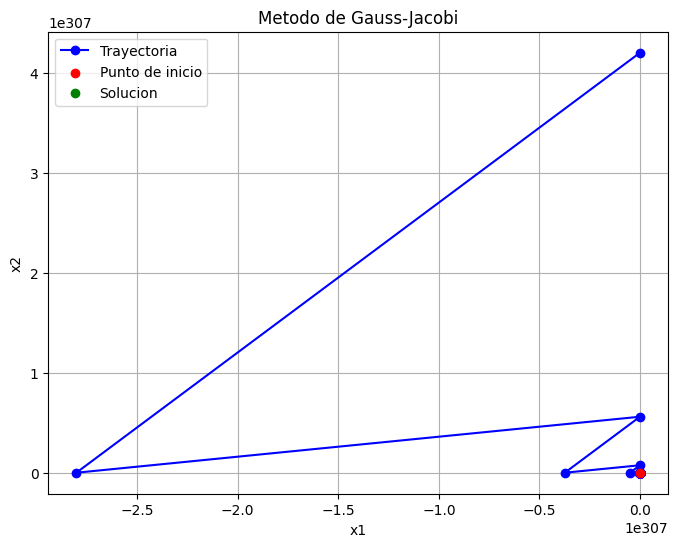

(-5.0, 5.0)

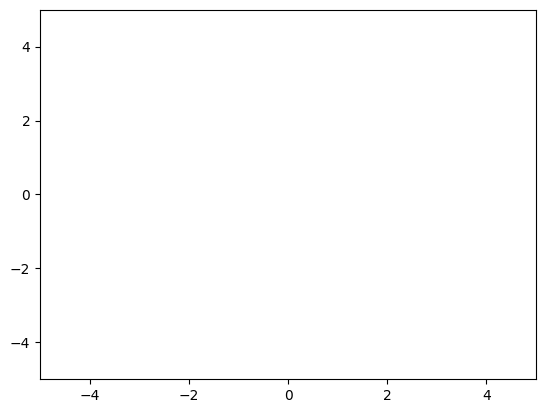

In [94]:
tray = np.array([x.flatten() for x in tray])
# Graficar
plt.figure(figsize=(8, 6))
plt.plot(tray[:, 0], tray[:, 1], marker='o', color='b', label='Trayectoria')
plt.scatter(x0[0], x0[1], color='r', label='Punto de inicio', zorder=5)
plt.scatter(solucionJacobi[0], solucionJacobi[1], color='g', label='Solucion', zorder=5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Metodo de Gauss-Jacobi')

plt.legend()
plt.grid(True)
plt.show()

#Zoom
plt.xlim(-5, 5)  # Rango para el eje x 
plt.ylim(-5, 5)  # Rango para el eje y 


# Gauss-Seidel

In [95]:
A = np.array([[3, 2], [2, 10]])
b = np.array([11, 16])
x0 = np.array([1,1])
tol = 1e-6
max_iter = 1000

solucionSeidel, tray = gauss_seidel(A= A, b= b,x0 = x0, tol= tol, max_iter=max_iter)


[01-25 08:57:06][INFO] i= 0 x: [1 1]
[01-25 08:57:06][INFO] i= 1 x: [[3. 1.]]


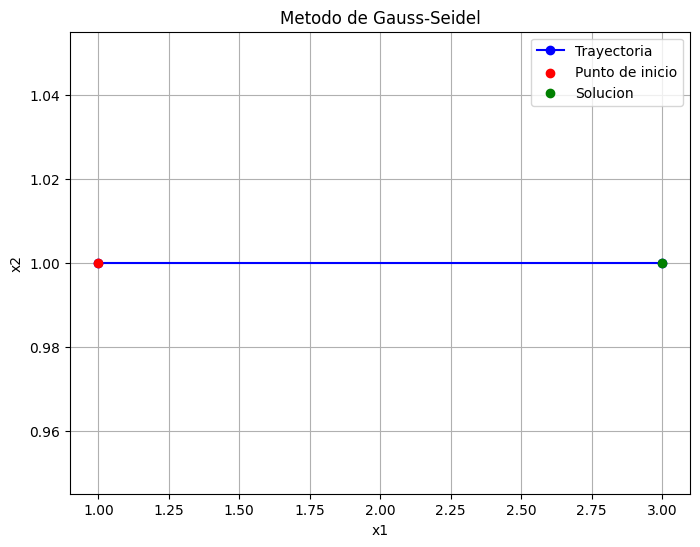

In [96]:
tray = np.array([x.flatten() for x in tray])
# Graficar
plt.figure(figsize=(8, 6))
plt.plot(tray[:, 0], tray[:, 1], marker='o', color='b', label='Trayectoria')
plt.scatter(x0[0], x0[1], color='r', label='Punto de inicio', zorder=5)
plt.scatter(solucionSeidel[0], solucionSeidel[1], color='g', label='Solucion', zorder=5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Metodo de Gauss-Seidel')

plt.legend()
plt.grid(True)
plt.show()